# Exploratory analysis

In [1]:
# Import dependencies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as s

In [2]:
# Load files for analysis
pitstops_df = pd.read_csv('../Resources/Dataset/pit_stops.csv')
races_df = pd.read_csv('../Resources/Dataset/races.csv')
constructors_df = pd.read_csv('../Resources/Dataset/constructors.csv')
constructor_standings_df = pd.read_csv('../Resources/Dataset/constructor_standings.csv')
results_df = pd.read_csv('../Resources/Dataset/results.csv')

# Join Tables

In [3]:
# Merge results_df with races_df on raceId.
results_df = results_df.merge(races_df, left_on='raceId', right_on='raceId',how='left')
print(results_df.shape)
results_df.head()

(25040, 25)


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapTime,fastestLapSpeed,statusId,year,round,circuitId,name,date,time_y,url
0,1,18,1,1,22,1,1,1,1,10.0,...,1:27.452,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
1,2,18,2,2,3,5,2,2,2,8.0,...,1:27.739,217.586,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
2,3,18,3,3,7,7,3,3,3,6.0,...,1:28.090,216.719,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
3,4,18,4,4,5,11,4,4,4,5.0,...,1:28.603,215.464,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
4,5,18,5,1,23,3,5,5,5,4.0,...,1:27.418,218.385,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...


In [4]:
# Groupby pitstop table on raceId and driverId.
pitstop_prob = pitstops_df.groupby(['raceId','driverId']).agg({'stop':'sum', 'milliseconds':'sum'})
pitstop_prob.reset_index()

,raceId,driverId,stop,milliseconds
0,841,1,3,46426
1,841,2,3,48092
2,841,3,1,23716
3,841,4,6,72165
4,841,5,1,24865
...,...,...,...,...
3965,1055,846,3,44331
3966,1055,847,3,45733
3967,1055,849,6,70501
3968,1055,853,3,45600


In [5]:
# Merge results_df with pitstop_prob on raceId and driverId.
results_df = (results_df.merge(pitstop_prob, left_on=['raceId','driverId'], right_on=['raceId','driverId'],how='right'))
print(results_df.shape)
results_df.head()

(3970, 27)


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,statusId,year,round,circuitId,name,date,time_y,url,stop,milliseconds_y
0,20780,841,1,1,3,2,2,2,2,18.0,...,1,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,3,46426
1,20790,841,2,4,9,18,12,12,12,0.0,...,11,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,3,48092
2,20795,841,3,131,8,7,\N,R,17,0.0,...,4,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,1,23716
3,20782,841,4,6,5,5,4,4,4,12.0,...,1,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,6,72165
4,20796,841,5,205,20,19,\N,R,18,0.0,...,47,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,1,24865


In [6]:
# Groupby results table on constructorId.
pitstop_prob_results = results_df.groupby(['constructorId', 'circuitId']).agg({'raceId': 'count', 'stop':'sum', 'milliseconds_y':'sum', 'points': 'sum'})
pitstop_prob_results.reset_index(inplace=True)

In [7]:
# Merge pitstop_prob_results with constructors_df  on constructorId.
constructor_results_df = (pitstop_prob_results.merge(constructors_df, left_on='constructorId', right_on='constructorId',how='left')
                          .reindex(columns=['constructorId', 'raceId', 'circuitId', 'stop', 'milliseconds_y', 'points', 'name']))
print(constructor_results_df.shape)
constructor_results_df = constructor_results_df.rename(columns={'milliseconds_y': 'milliseconds'})

(510, 7)


In [8]:
# PointsPerRace, TimePerRace, StopsPerRace columns are created.
constructor_results_df['pointsPerRace'] = round(constructor_results_df.points/constructor_results_df.raceId, 2)
constructor_results_df['TimePerRace'] = round(constructor_results_df.milliseconds/constructor_results_df.raceId, 2)
constructor_results_df['stopsPerRace'] = round(constructor_results_df.stop/constructor_results_df.raceId, 2)
constructor_results_df

,constructorId,raceId,circuitId,stop,milliseconds,points,name,pointsPerRace,TimePerRace,stopsPerRace
0,1,16,1,46,1729513,113.0,McLaren,7.06,108094.56,2.88
1,1,14,2,83,1055353,63.0,McLaren,4.50,75382.36,5.93
2,1,19,3,92,3478140,85.0,McLaren,4.47,183060.00,4.84
3,1,22,4,85,1037638,76.0,McLaren,3.45,47165.36,3.86
4,1,4,5,22,258878,35.0,McLaren,8.75,64719.50,5.50
...,...,...,...,...,...,...,...,...,...,...
505,213,1,76,15,2799562,6.0,AlphaTauri,6.00,2799562.00,15.00
506,214,2,3,6,98845,0.0,Alpine F1 Team,0.00,49422.50,3.00
507,214,2,4,4,68320,2.0,Alpine F1 Team,1.00,34160.00,2.00
508,214,2,21,21,3204763,3.0,Alpine F1 Team,1.50,1602381.50,10.50


In [9]:
# Select the data where circuitId == 1.
constructor_results_df1= constructor_results_df[(constructor_results_df['circuitId']==1)]

In [10]:
# Correlation matrix.
corrMatrix = constructor_results_df1.drop(columns=['raceId', 'circuitId']).corr()
corrMatrix

,constructorId,stop,milliseconds,points,pointsPerRace,TimePerRace,stopsPerRace
constructorId,1.000000,-0.756871,-0.761791,-0.427599,-0.381133,-0.115540,-0.124439
stop,-0.756871,1.000000,0.827857,0.592959,0.507786,0.125272,0.552926
milliseconds,-0.761791,0.827857,1.000000,0.546324,0.463562,0.455023,0.269593
points,-0.427599,0.592959,0.546324,1.000000,0.962069,0.029237,0.070272
pointsPerRace,-0.381133,0.507786,0.463562,0.962069,1.000000,-0.024714,0.011326
TimePerRace,-0.115540,0.125272,0.455023,0.029237,-0.024714,1.000000,0.272673
stopsPerRace,-0.124439,0.552926,0.269593,0.070272,0.011326,0.272673,1.000000


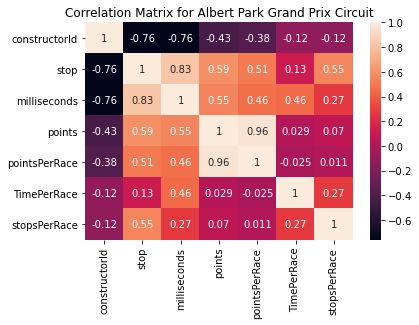

In [11]:
# Display correlation matrix on a heatmap.
s.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix for Albert Park Grand Prix Circuit')
plt.show()

In [12]:
# Select the data where constructorId == 1.
constructor_results_df2= constructor_results_df[(constructor_results_df['constructorId']==1)]

In [13]:
# Correlation matrix.
corrMatrix = constructor_results_df2.drop(columns=['constructorId', 'raceId']).corr()
corrMatrix

,circuitId,stop,milliseconds,points,pointsPerRace,TimePerRace,stopsPerRace
circuitId,1.000000,-0.472998,-0.104312,-0.437628,0.055441,0.324146,0.177941
stop,-0.472998,1.000000,0.371179,0.729530,-0.227918,-0.193252,0.116818
milliseconds,-0.104312,0.371179,1.000000,0.297724,0.058446,0.375081,0.258083
points,-0.437628,0.729530,0.297724,1.000000,0.097671,-0.301194,-0.197033
pointsPerRace,0.055441,-0.227918,0.058446,0.097671,1.000000,0.319155,0.324792
TimePerRace,0.324146,-0.193252,0.375081,-0.301194,0.319155,1.000000,0.833301
stopsPerRace,0.177941,0.116818,0.258083,-0.197033,0.324792,0.833301,1.000000


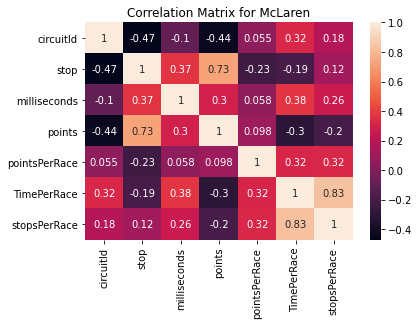

In [14]:
# Display correlation matrix on a heatmap.
s.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix for McLaren')
plt.show()